In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree
from sklearn.model_selection import learning_curve

In [2]:
# 1. Cargar el dataset
data = pd.read_csv('C:/Users/user/Desktop/Practica Python/CBC data_for_meandeley_csv_01052023.csv')

In [3]:
# Crear una copia del dataset original
dataset_copy_RF = data.copy()

In [4]:
# Definir las columnas que vas a usar en el modelo
columns_to_use_RF = ['RBC', 'PCV', 'MCV', 'MCH', 'MCHC', 'RDW', 'TLC', 'PLT /mm3', 'HGB']

In [19]:
descripcion = dataset_copy_RF.describe()
print(descripcion)

           S. No.         Age         Sex         RBC         PCV         MCV  \
count  364.000000  364.000000  364.000000  364.000000  364.000000  364.000000   
mean   182.500000   44.917582    0.442308    4.278736   36.762912   87.509121   
std    105.221988   18.780854    0.497344    0.820166    6.830835    9.332164   
min      1.000000   11.000000    0.000000    1.360000   13.100000   55.700000   
25%     91.750000   28.000000    0.000000    3.780000   32.900000   83.175000   
50%    182.500000   44.500000    0.000000    4.335000   36.800000   87.950000   
75%    273.250000   60.000000    1.000000    4.800000   41.850000   91.875000   
max    364.000000   89.000000    1.000000    6.900000   56.900000  124.100000   

              MCH        MCHC         RDW         TLC    PLT /mm3         HGB  
count  364.000000  364.000000  364.000000  364.000000  364.000000  364.000000  
mean    28.227143   32.053407   15.116511    8.863571  223.750824   11.907692  
std      3.865998    2.801790 

In [7]:
# Preparar los datos (features y target)
X = dataset_copy_RF[columns_to_use_RF]  # Variables independientes (features)
y = dataset_copy_RF['HGB']  # Variable dependiente (lo que estás prediciendo)

In [8]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Instanciar el modelo Random Forest
rf = RandomForestRegressor()

In [10]:
# Definir los hiperparámetros que queremos probar en GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],            # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],            # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],            # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],              # Número mínimo de muestras en cada hoja
    'bootstrap': [True, False]                  # Si utilizar el muestreo bootstrap
}

In [11]:
# Usar GridSearchCV para encontrar los mejores parámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [13]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [15]:
# Usar el mejor modelo encontrado para predecir los datos de prueba
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [17]:
# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 32.91822636986299
R-squared (R2): 0.9965573746674806


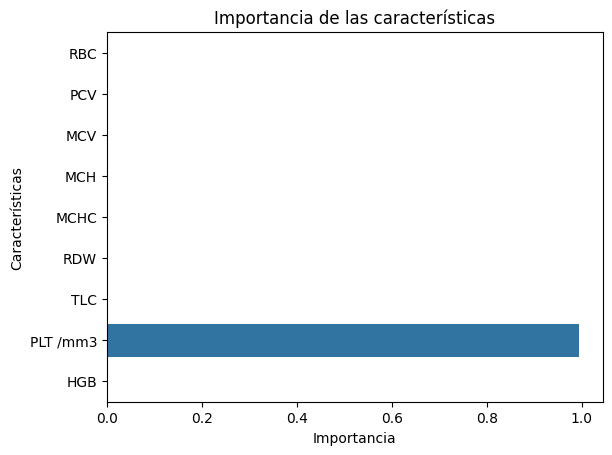

In [18]:
# Visualizar la importancia de las variables
feature_importances = best_rf.feature_importances_
sns.barplot(x=feature_importances, y=columns_to_use_RF)
plt.title('Importancia de las características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

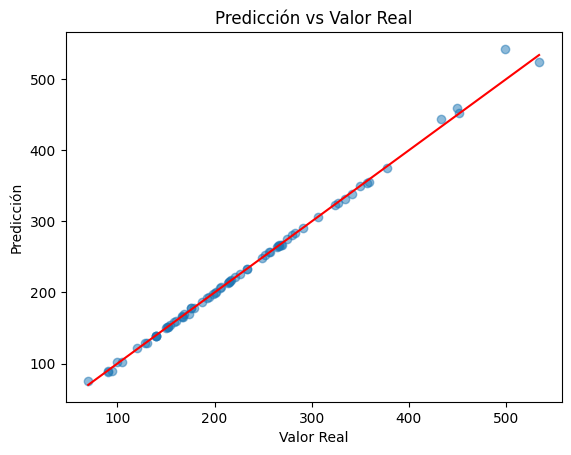

In [19]:
# Graficar los resultados (predicción vs valor real)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Predicción vs Valor Real')
plt.show()

In [21]:
# Crear un DataFrame con la importancia de las características
importance_df = pd.DataFrame({
    'Feature': columns_to_use_RF,
    'Importance': feature_importances
})

In [22]:
# Ordenar la tabla por la importancia de las características de mayor a menor
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar la tabla
print(importance_df)

    Feature  Importance
7  PLT /mm3    0.994735
5       RDW    0.001110
8       HGB    0.000889
0       RBC    0.000838
2       MCV    0.000664
1       PCV    0.000527
4      MCHC    0.000508
6       TLC    0.000382
3       MCH    0.000347


In [23]:
# Crear un DataFrame con valores reales y predichos
predictions_df = pd.DataFrame({
    'Valor Real': y_test,
    'Predicción': y_pred
})

# Mostrar las primeras filas de la tabla
print(predictions_df.head())

     Valor Real  Predicción
193       176.0     178.180
33        221.0     221.180
15        268.0     266.990
347       265.0     264.775
57        206.0     205.975


In [24]:
# Calcular el error absoluto
predictions_df['Error Absoluto'] = abs(predictions_df['Valor Real'] - predictions_df['Predicción'])

# Mostrar las primeras filas de la tabla con los errores
print(predictions_df.head())

     Valor Real  Predicción  Error Absoluto
193       176.0     178.180           2.180
33        221.0     221.180           0.180
15        268.0     266.990           1.010
347       265.0     264.775           0.225
57        206.0     205.975           0.025


In [25]:
# Mostrar los mejores parámetros encontrados
best_params_df = pd.DataFrame([grid_search.best_params_])
print("Mejores hiperparámetros:")
print(best_params_df)

Mejores hiperparámetros:
   bootstrap max_depth  min_samples_leaf  min_samples_split  n_estimators
0       True      None                 1                  2           200


In [26]:
# Crear un DataFrame con los resultados de la validación cruzada
cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Mostrar las columnas más relevantes
print(cv_results_df[['mean_test_score', 'std_test_score', 'params']].head())

   mean_test_score  std_test_score  \
0         0.991752        0.006019   
1         0.992701        0.005066   
2         0.992426        0.004766   
3         0.989841        0.006533   
4         0.991377        0.006369   

                                              params  
0  {'bootstrap': True, 'max_depth': None, 'min_sa...  
1  {'bootstrap': True, 'max_depth': None, 'min_sa...  
2  {'bootstrap': True, 'max_depth': None, 'min_sa...  
3  {'bootstrap': True, 'max_depth': None, 'min_sa...  
4  {'bootstrap': True, 'max_depth': None, 'min_sa...  


In [27]:
# Añadir una columna de importancia acumulada
importance_df['Importancia Acumulada'] = importance_df['Importance'].cumsum()

# Mostrar la tabla con la importancia acumulada
print(importance_df)

    Feature  Importance  Importancia Acumulada
7  PLT /mm3    0.994735               0.994735
5       RDW    0.001110               0.995845
8       HGB    0.000889               0.996733
0       RBC    0.000838               0.997572
2       MCV    0.000664               0.998236
1       PCV    0.000527               0.998763
4      MCHC    0.000508               0.999271
6       TLC    0.000382               0.999653
3       MCH    0.000347               1.000000


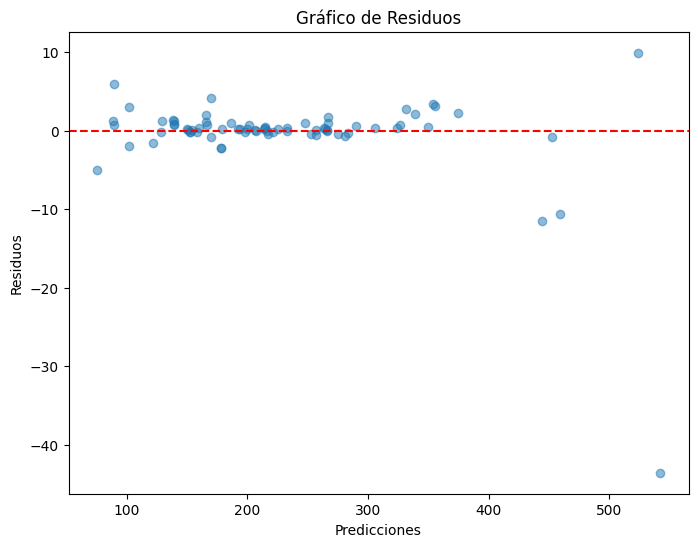

In [31]:
# Calcular los residuos (errores)
residuals = y_test - y_pred

# Graficar los residuos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()


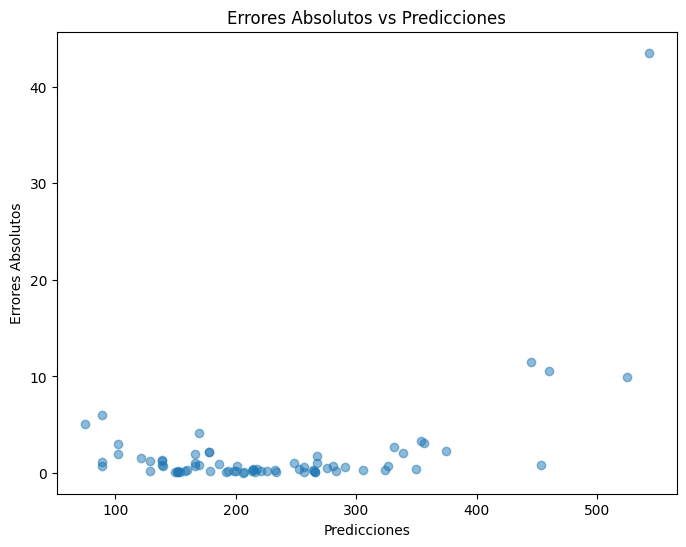

In [32]:
# Calcular el error absoluto
absolute_errors = abs(y_test - y_pred)

# Graficar las predicciones vs errores absolutos
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, absolute_errors, alpha=0.5)
plt.xlabel('Predicciones')
plt.ylabel('Errores Absolutos')
plt.title('Errores Absolutos vs Predicciones')
plt.show()

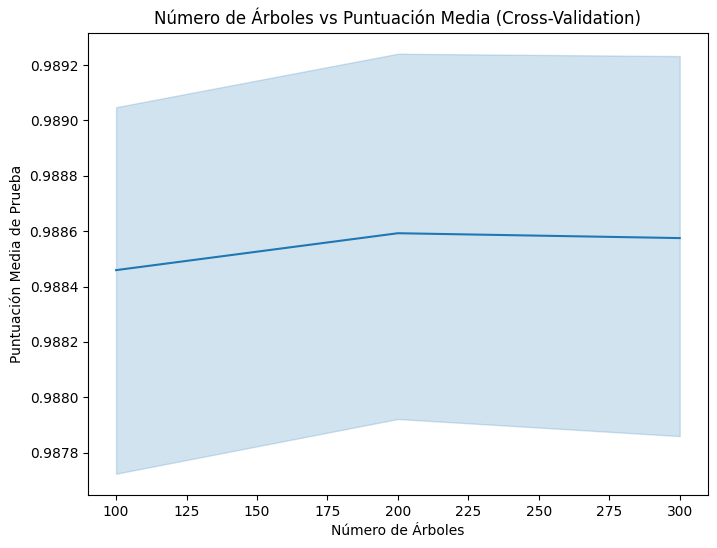

In [33]:
# Resultados de GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Graficar el número de árboles (n_estimators) vs desempeño (mean_test_score)
plt.figure(figsize=(8, 6))
sns.lineplot(x=results['param_n_estimators'], y=results['mean_test_score'])
plt.xlabel('Número de Árboles')
plt.ylabel('Puntuación Media de Prueba')
plt.title('Número de Árboles vs Puntuación Media (Cross-Validation)')
plt.show()

In [35]:
# Definir el rango de tamaños de los datos de entrenamiento
train_sizes, train_scores, test_scores = learning_curve(best_rf, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

In [36]:
# Calcular la media y desviación estándar de las puntuaciones
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

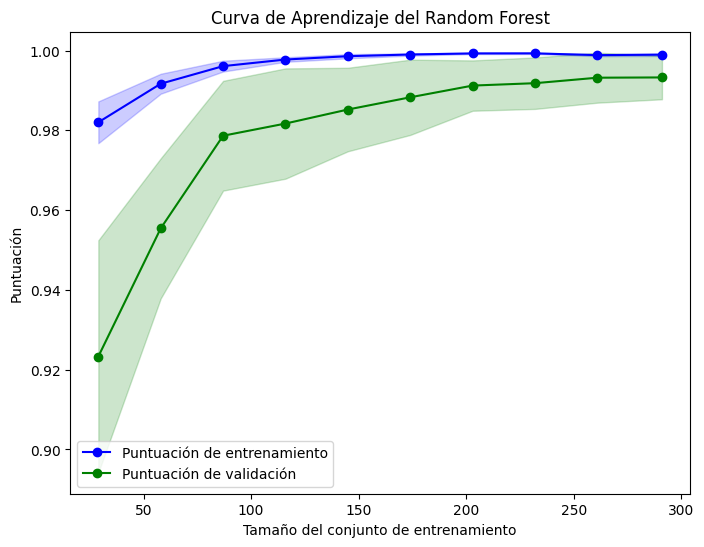

In [37]:
# Graficar la curva de aprendizaje
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', label='Puntuación de entrenamiento')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, color='green', marker='o', label='Puntuación de validación')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Puntuación')
plt.title('Curva de Aprendizaje del Random Forest')
plt.legend()
plt.show()

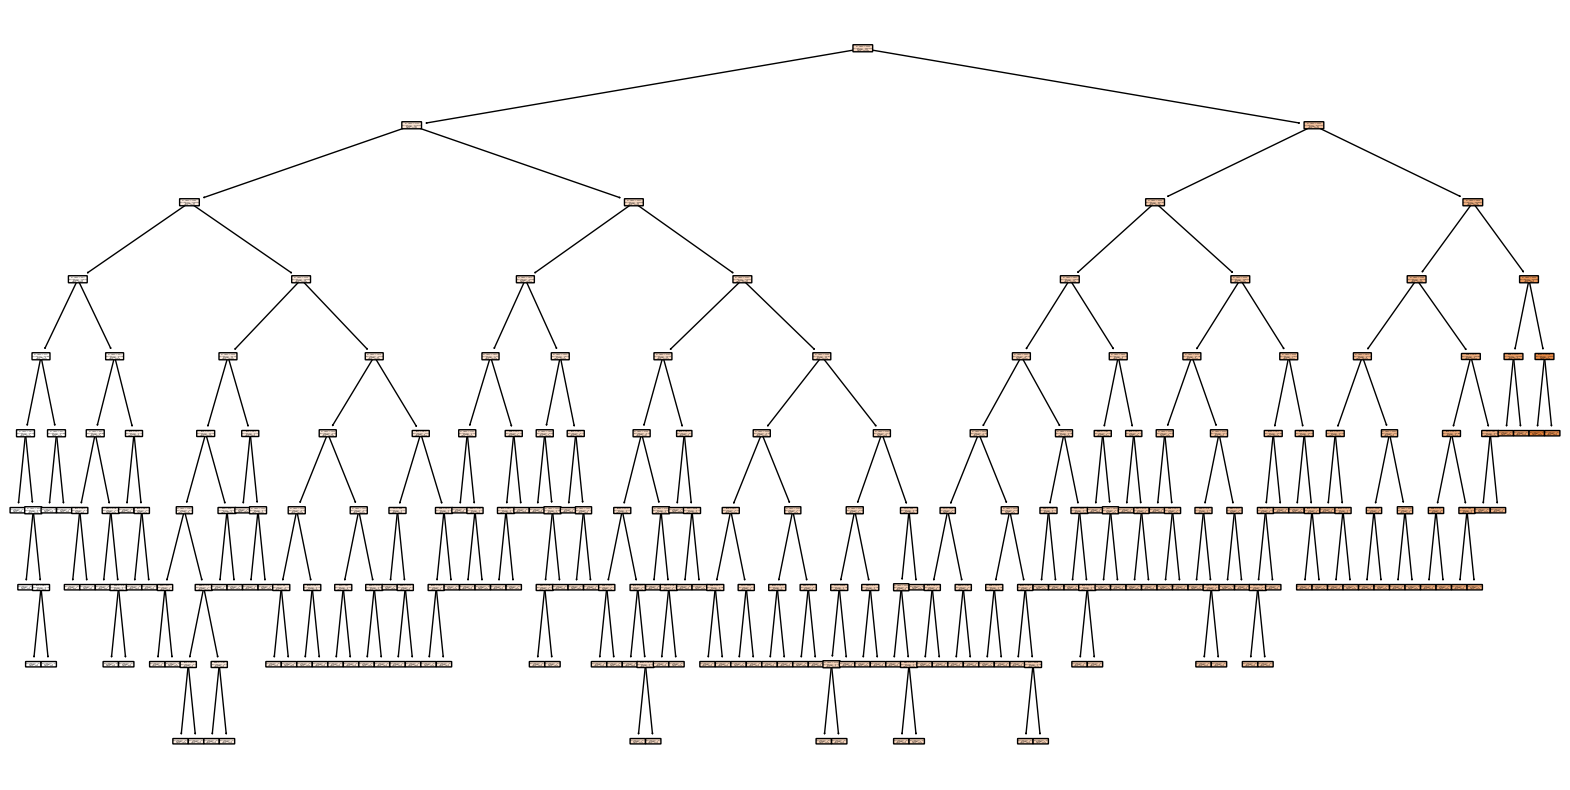

In [41]:
# Visualizar uno de los árboles del bosque aleatorio
plt.figure(figsize=(20, 10))
plot_tree(best_rf.estimators_[0], feature_names=columns_to_use_RF, filled=True, rounded=True)
plt.show()